In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.manifold import LocallyLinearEmbedding, TSNE, MDS
from time import time
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

Exercise 9

In [2]:
mnist = fetch_openml('mnist_784', version=1, parser='auto')

In [3]:
X,y = mnist['data'].to_numpy(), mnist['target'].to_numpy()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=60000, random_state=42)

In [17]:
rf_clf = RandomForestClassifier(n_estimators=150)

In [18]:
ti = time()

rf_clf.fit(X_train, y_train)

print((time() - ti)/60, 'min')

1.773283306757609 min


In [19]:
y_pred = rf_clf.predict(X_test)

In [20]:
rf_clf.score(X_test, y_test)

0.9678

In [12]:
pca = PCA(n_components=0.95)

In [13]:
X_train_red = pca.fit_transform(X_train)

In [15]:
print(X_train_red.shape)
print(y_train.shape)

(60000, 154)
(60000,)


In [22]:
ti = time()

rf_clf.fit(X_train_red, y_train)

print((time() - ti)/60, 'min')

5.01820182800293 min


In [25]:
X_test_red = pca.transform(X_test)

In [26]:
rf_clf.score(X_test_red, y_test)

0.9496

Exercise 10

In [5]:
X.shape

(70000, 784)

In [7]:
tsne = TSNE(n_components=2)

In [51]:
a = 4000
X_a = X[:a]
X_tsne = tsne.fit_transform(X_a)

In [52]:
X_tsne.shape

(4000, 2)

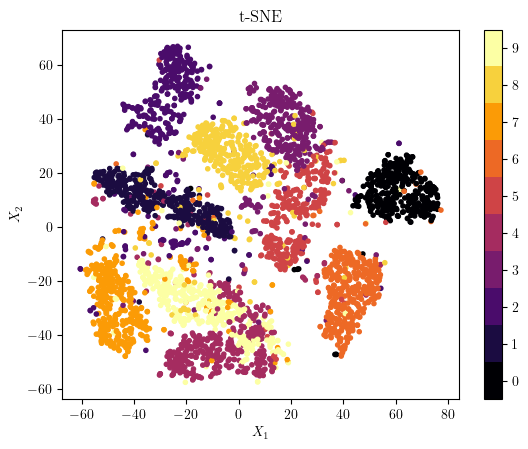

In [54]:
n = len(np.unique(y.astype(int)))

plot = plt.scatter(X_tsne[:,0].ravel(), X_tsne[:,1].ravel(), marker='.', c=y[:a].astype(int), cmap=plt.cm.get_cmap('inferno', n))
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')

plt.colorbar(plot, ticks=range(0,10))
plt.clim(-0.5,9.5)
plt.title('t-SNE')
plt.show()

In [57]:
pca = PCA(n_components=2)
lle = LocallyLinearEmbedding(n_components=2)
mds = MDS(n_components=2)

In [59]:
X_pca = pca.fit_transform(X_a)

In [60]:
X_lle = lle.fit_transform(X_a)

In [61]:
X_mds = mds.fit_transform(X_a)

c:\Users\Marcos\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


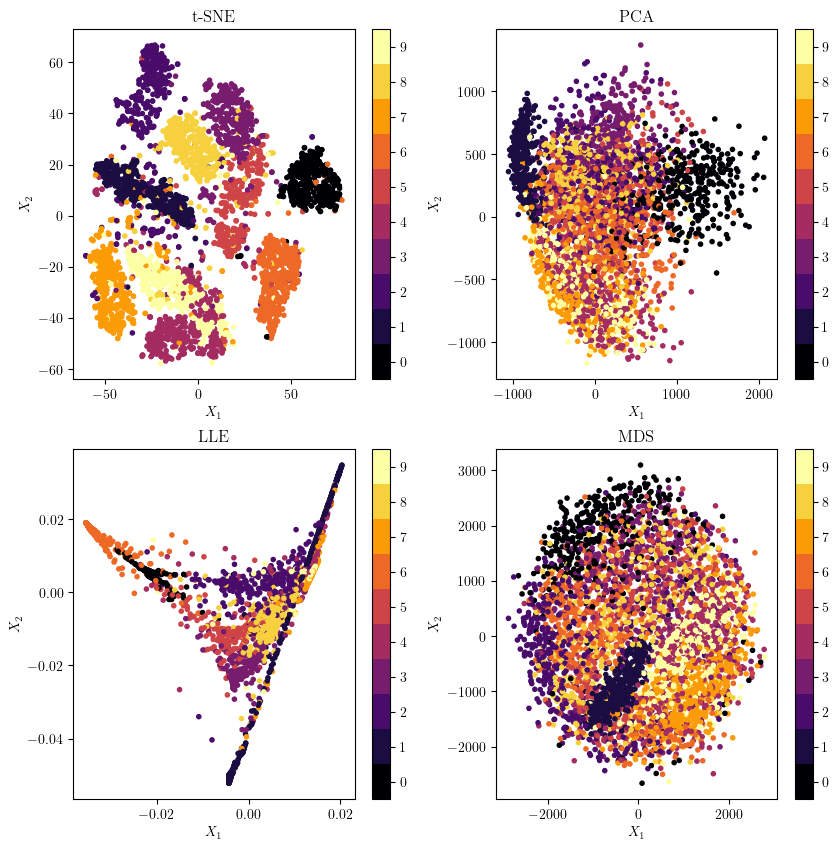

In [64]:
n = len(np.unique(y.astype(int)))

plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plot = plt.scatter(X_embedded[:,0].ravel(),X_embedded[:,1].ravel(), marker='.', c=y[:a].astype(int), cmap=plt.cm.get_cmap('inferno', n))
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.colorbar(plot, ticks=range(0,10))
plt.clim(-0.5,9.5)
plt.title('t-SNE')

plt.subplot(2,2,2)
plot = plt.scatter(X_pca[:,0].ravel(), X_pca[:,1].ravel(), marker='.', c=y[:a].astype(int), cmap=plt.cm.get_cmap('inferno', n))
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.colorbar(plot, ticks=range(0,10))
plt.clim(-0.5,9.5)
plt.title('PCA')

plt.subplot(2,2,3)
plot = plt.scatter(X_lle[:,0].ravel(), X_lle[:,1].ravel(), marker='.', c=y[:a].astype(int), cmap=plt.cm.get_cmap('inferno', n))
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.colorbar(plot, ticks=range(0,10))
plt.clim(-0.5,9.5)
plt.title('LLE')

plt.subplot(2,2,4)
plot = plt.scatter(X_mds[:,0].ravel(), X_mds[:,1].ravel(), marker='.', c=y[:a].astype(int), cmap=plt.cm.get_cmap('inferno', n))
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.colorbar(plot, ticks=range(0,10))
plt.clim(-0.5,9.5)
plt.title('MDS')

plt.show()